In [134]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf 

In [135]:
categories_text = open('/content/drive/My Drive/category_mini.txt','r')
categories = categories_text.readlines()
categories_text.close()

In [136]:
categories = [c.replace('\n', '').replace(' ','_').replace("'", "").replace(',', '') for c in categories]

In [137]:
!mkdir npy

In [141]:
cat_limit = categories[:25]

In [142]:
import urllib.request


def download():
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  counter = 1
  for i in cat_limit:
    space = i.replace('_', '%20')
    path = base+space+'.npy'
    print(f'{path} {counter}/{len(cat_limit)}')
    counter += 1
    urllib.request.urlretrieve(path, 'npy/'+i+'.npy')

In [143]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ant.npy 1/6
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bat.npy 2/6
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bear.npy 3/6
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bee.npy 4/6
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bird.npy 5/6
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/butterfly.npy 6/6


In [ ]:
all_files = glob.glob(os.path.join('npy', '*.npy'))

In [ ]:
X = np.empty([0, 784])
y = np.empty([0])
label_names = []

for idx, file in enumerate(all_files):
  data = np.load(file)
  data = data[0: 10000, :]
  labels = np.full(data.shape[0], idx)

  X = np.concatenate((X, data), axis=0)
  y = np.append(y, labels)
  
  label_name, extension = os.path.splitext(os.path.basename(file))
  label_names.append(label_name)

29987
dragon


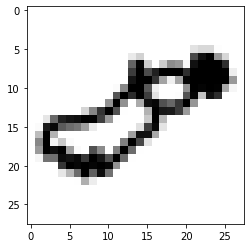

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, X.shape[0])
print(idx)
plt.imshow(X[idx].reshape(28,28), cmap='binary')
print(label_names[int(y[idx].item())])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=24)

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
X_train = tf.reshape(X_train,[-1,28,28])
X_test = tf.reshape(X_test,[-1,28,28])
X_train = tf.expand_dims(X_train, 3)
X_test = tf.expand_dims(X_test, 3)

In [ ]:
X_train.shape

TensorShape([200000, 28, 28, 1])

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(label_names))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(label_names))
# y_train = tf.convert_to_tensor(y_train)
# y_test = tf.convert_to_tensor(y_test)

In [ ]:
print(f'{y_test.shape}.{y_train.shape}')
print(f'{X_test.shape},{X_train.shape}')
y_train.shape

(50000, 25).(200000, 25)
(50000, 28, 28, 1),(200000, 28, 28, 1)


(200000, 25)

In [ ]:
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
#   .shuffle(2500).batch(32)
# test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)) \
#   .batch(32)

# BATCH_SIZE = 64
# SHUFFLE_BUFFER_SIZE = 100

# train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# test_dataset = test_dataset.batch(BATCH_SIZE)
# print(train_dataset.element_spec)

In [ ]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3,3),
                               padding='same',
                               input_shape=X_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Convolution2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.Convolution2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Convolution2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.Convolution2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(cat_limit), activation='softmax'))

adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          3

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=256, validation_split=0.1, verbose=2, epochs=5)

Epoch 1/5
704/704 - 6s - loss: 1.7156 - accuracy: 0.5082 - val_loss: 1.3141 - val_accuracy: 0.6229
Epoch 2/5
704/704 - 6s - loss: 1.1811 - accuracy: 0.6581 - val_loss: 1.1637 - val_accuracy: 0.6661
Epoch 3/5
704/704 - 6s - loss: 1.0375 - accuracy: 0.6970 - val_loss: 1.0290 - val_accuracy: 0.7039
Epoch 4/5
704/704 - 6s - loss: 0.9519 - accuracy: 0.7218 - val_loss: 0.9643 - val_accuracy: 0.7219
Epoch 5/5
704/704 - 6s - loss: 0.8916 - accuracy: 0.7367 - val_loss: 0.9402 - val_accuracy: 0.7301


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

1563/1563 [==============================] - 4s 3ms/step - loss: 0.9432 - accuracy: 0.7247
Test accuracy: 72.47%


184529
duck


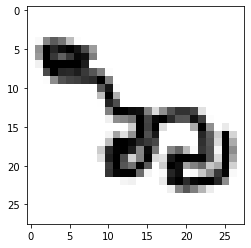

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, X.shape[0])
print(idx)
plt.imshow(X[idx].reshape(28,28), cmap='binary')
print(label_names[int(y[idx].item())])


In [ ]:
# !pip install tensorflowjs

In [ ]:
# with open('class_names25.txt', 'w') as file_handler:
#   for item in cat_limit:
#     file_handler.write(f'{item}')

In [ ]:
# model.save('keras25.h5')

In [ ]:
# !mkdir model

In [ ]:
# !tensorflowjs_converter --input_format keras keras25.h5 model/

In [ ]:
# !cp class_names25.txt model/class_names25.txt

In [ ]:
# !zip -r model25.zip model

In [ ]:
# from google.colab import files
# files.download('model25.zip')

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

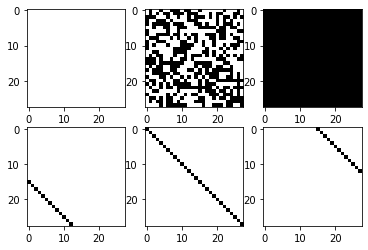

In [133]:
rand = np.floor(np.random.random((28,28)) + .5)
all_black = np.full((28,28, 3), 0)
all_white = np.ones((28,28))
diag = np.eye(28)
diag_low = np.eye(28, k=-15)
diag_high = np.eye(28, k=15)

plt.subplot(231)
plt.imshow(all_white, cmap='binary')
plt.subplot(232)
plt.imshow(rand, cmap='binary')
plt.subplot(233)
plt.imshow(all_black, cmap='binary')
plt.subplot(234)
plt.imshow(diag_low, cmap='binary')
plt.subplot(235)
plt.imshow(diag, cmap='binary')
plt.subplot(236)
plt.imshow(diag_high, cmap='binary')

In [243]:
first6 = cat_limit[:6]
first6

['ant', 'bat', 'bear', 'bee', 'bird', 'butterfly']

In [244]:
dummy_files = glob.glob(os.path.join('npy', '*.npy'))
dummy_data = []
for index, file in enumerate(dummy_files):
  test_data = np.load(file)
  dummy_data.append(test_data[:])

You can change which category of doodles by changing the index number of dummy_data below.

In [253]:
category_array = np.array(dummy_data[0])
category_array.shape

(124612, 784)

Set up to take select a random image from the corresponding category and reshapes it so it is plot-able.

Feel free to select your own index if you prefer.

In [241]:
plot_me = category_array[random.randrange(len(category_array[0]))]
plot_me = plot_me.reshape(28,28)

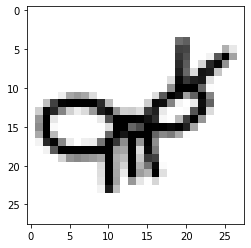

In [242]:
plt.imshow(plot_me, cmap='binary')

In [213]:
butterfly = dummy_files[1]

In [214]:
butterfly_data = np.load(butterfly)
butterfly_data.shape

(117999, 784)